# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:
# set up for loop counter
cities_count = len(cities)

#set up lists 
# initialize various lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + city

# header
print("Beginning Data Retreival")
print("-----------------------------")

# loop through all the cities

for x in range(cities_count):
    print(f"Processing Record {x} of Set something | {cities[x]}.")
    params = {"q":cities[x],
                  "units":"imperial",
                "appid":weather_api_key}
    try:      
        response = requests.get(url, params=params)
        response_json = response.json()
    
        # read the json into the various lists
        City.append(response_json['name'])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Max_Temp.append(response_json['main']['temp_max'])
        Humidity.append(response_json['main']['humidity'])
        Cloudiness.append(response_json['clouds']['all'])
        Wind_Speed.append(response_json['wind']['speed'])
        Country.append(response_json['sys']['country'])
        Date.append(response_json['dt'])
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retreival
-----------------------------
Processing Record 0 of Set something | victoria.
Processing Record 1 of Set something | dzhusaly.
City not found. Skipping...
Processing Record 2 of Set something | cidreira.
Processing Record 3 of Set something | new norfolk.
Processing Record 4 of Set something | kapaa.
Processing Record 5 of Set something | kahului.
Processing Record 6 of Set something | tori.
Processing Record 7 of Set something | tiksi.
Processing Record 8 of Set something | barlad.
Processing Record 9 of Set something | aguimes.
Processing Record 10 of Set something | ambulu.
Processing Record 11 of Set something | barentsburg.
City not found. Skipping...
Processing Record 12 of Set something | beringovskiy.
Processing Record 13 of Set something | bredasdorp.
Processing Record 14 of Set something | vostok.
Processing Record 15 of Set something | airai.
Processing Record 16 of Set something | smolensk.
Processing Record 17 of Set something | nanzhou.
Processin

Processing Record 154 of Set something | kruisfontein.
Processing Record 155 of Set something | isangel.
Processing Record 156 of Set something | kavieng.
Processing Record 157 of Set something | westport.
Processing Record 158 of Set something | coromandel.
Processing Record 159 of Set something | hobyo.
Processing Record 160 of Set something | rumuruti.
Processing Record 161 of Set something | luderitz.
Processing Record 162 of Set something | wanning.
Processing Record 163 of Set something | talnakh.
Processing Record 164 of Set something | severo-kurilsk.
Processing Record 165 of Set something | nguiu.
City not found. Skipping...
Processing Record 166 of Set something | shingu.
Processing Record 167 of Set something | georgetown.
Processing Record 168 of Set something | taltal.
Processing Record 169 of Set something | port blair.
Processing Record 170 of Set something | anadyr.
Processing Record 171 of Set something | benalla.
Processing Record 172 of Set something | aberdeen.
Proc

Processing Record 463 of Set something | lakhdenpokhya.
Processing Record 464 of Set something | camacha.
Processing Record 465 of Set something | zabaykalsk.
Processing Record 466 of Set something | harper.
Processing Record 467 of Set something | kyra.
Processing Record 468 of Set something | ostrovnoy.
Processing Record 469 of Set something | bintulu.
Processing Record 470 of Set something | dudinka.
Processing Record 471 of Set something | maldonado.
Processing Record 472 of Set something | itaueira.
Processing Record 473 of Set something | jojoima.
Processing Record 474 of Set something | faanui.
Processing Record 475 of Set something | marawi.
Processing Record 476 of Set something | kupang.
Processing Record 477 of Set something | sabzevar.
Processing Record 478 of Set something | ancud.
Processing Record 479 of Set something | muisne.
Processing Record 480 of Set something | kanniyakumari.
Processing Record 481 of Set something | hay river.
Processing Record 482 of Set somethin

Processing Record 619 of Set something | saryshagan.
City not found. Skipping...
Processing Record 620 of Set something | savonlinna.
Processing Record 621 of Set something | sentyabrskiy.
City not found. Skipping...
Processing Record 622 of Set something | gorontalo.
Processing Record 623 of Set something | watertown.
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
    "Humidity" : Humidity, "Cloudiness": Cloudiness, "Windspeed": Wind_Speed,
    "Country": Country, "Date": Date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Hong Kong,22.29,114.16,78.01,78,85,4.25,HK,1587340010
1,Cidreira,-30.18,-50.21,68.07,85,0,16.93,BR,1587340226
2,New Norfolk,-42.78,147.06,57.00,91,100,7.74,AU,1587340226
3,Kapaa,22.08,-159.32,80.60,61,1,10.29,US,1587340226
4,Kahului,20.89,-156.47,82.40,51,40,9.17,US,1587340227


In [100]:
# write data to a csv
weather_data.to_csv('weather_data_file.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [101]:
#find out how many entries the df contains
len(weather_data)

582

In [102]:
#use loc function to identify values under 'Humidity' over 100 (>100)

humidity_data = weather_data.loc[weather_data['Humidity'] > 100]

len(humidity_data)

#output indicates there are 0 entries in the Humidity column over 100, so I will be skipping this step.  


0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

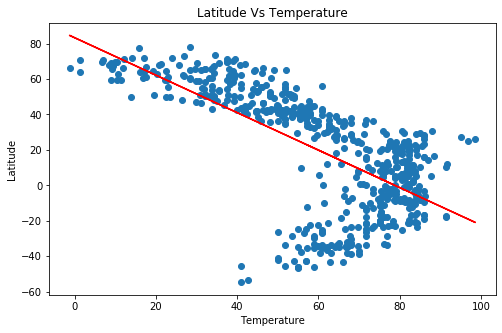

<Figure size 432x288 with 0 Axes>

In [103]:
fig, ax1 = plt.subplots(figsize=(8,5))

x_values = weather_data['Max Temp']
y_values = weather_data['Lat']
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Latitude')
ax1.set_title('Latitude Vs Temperature')

plt.scatter(x_values, y_values)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()

plt.savefig("Scatter1.png", bbox_inches='tight', dpi=600)

## Latitude vs. Humidity Plot

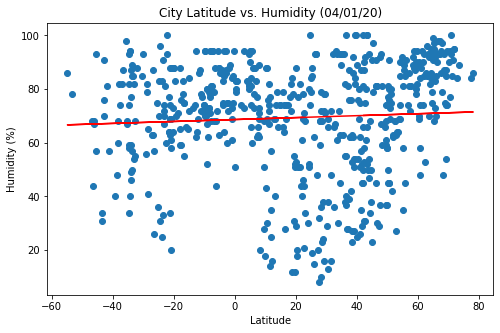

<Figure size 432x288 with 0 Axes>

In [104]:
fig, ax2 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Humidity']
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('City Latitude vs. Humidity (04/01/20)')

plt.scatter(x_values, y_values)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()

plt.savefig("Scatter2.png", bbox_inches='tight', dpi=600)

## Latitude vs. Cloudiness Plot

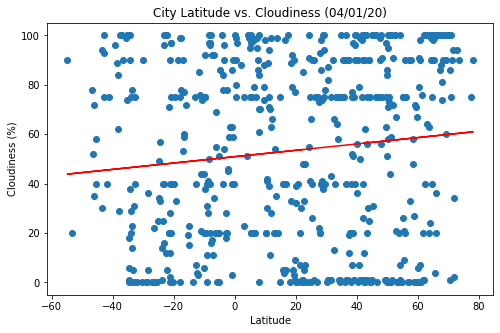

<Figure size 432x288 with 0 Axes>

In [105]:
fig, ax3 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness (%)')
ax3.set_title('City Latitude vs. Cloudiness (04/01/20)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter3.png", bbox_inches='tight', dpi=600)

## Latitude vs. Wind Speed Plot

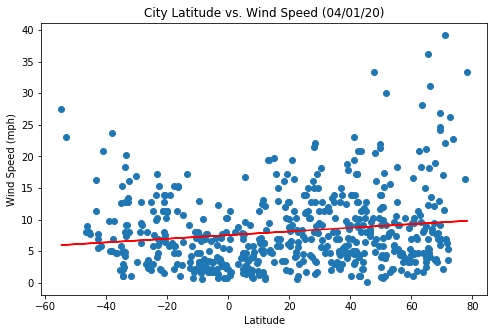

<Figure size 432x288 with 0 Axes>

In [106]:
fig, ax4 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Windspeed']
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_title('City Latitude vs. Wind Speed (04/01/20)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter4.png", bbox_inches='tight', dpi=600)

## Linear Regression

In [107]:
# Create Northern and Southern Hemisphere DataFrames

northern_weather_data = weather_data.loc[weather_data['Lat'] > 0]
southern_weather_data = weather_data.loc[weather_data['Lat'] < 0 ]
len(southern_weather_data)

189

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

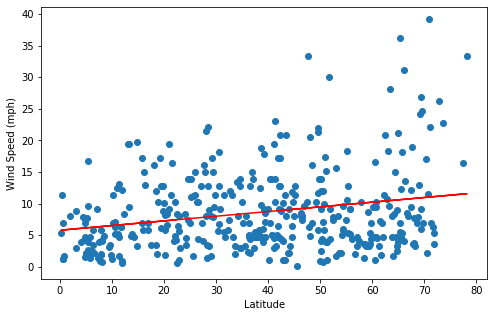

The r-squared is: 0.054758225212677196


<Figure size 432x288 with 0 Axes>

In [108]:
fig, ax5 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Windspeed']
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Wind Speed (mph)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter5.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

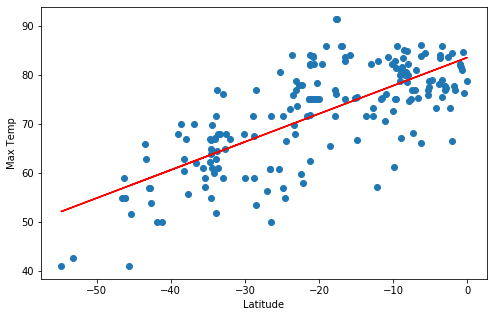

The r-squared is: 0.5331741335758025


<Figure size 432x288 with 0 Axes>

In [109]:
fig, ax6 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Max Temp']
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Max Temp')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter6.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

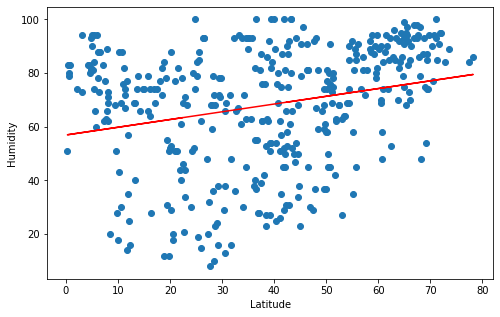

The r-squared is: 0.0654738108861745


<Figure size 432x288 with 0 Axes>

In [110]:
fig, ax7 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Humidity']
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Humidity')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter7.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

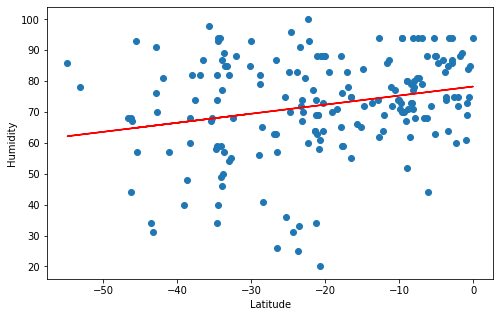

The r-squared is: 0.057456679854084904


<Figure size 432x288 with 0 Axes>

In [111]:
fig, ax8 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Humidity']
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Humidity')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter8.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

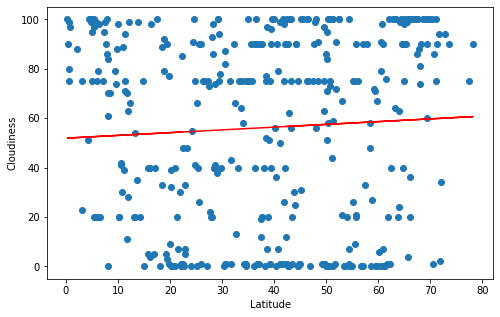

The r-squared is: 0.0034834483481656093


<Figure size 432x288 with 0 Axes>

In [112]:
fig, ax9 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Cloudiness']
ax9.set_xlabel('Latitude')
ax9.set_ylabel('Cloudiness')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter9.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

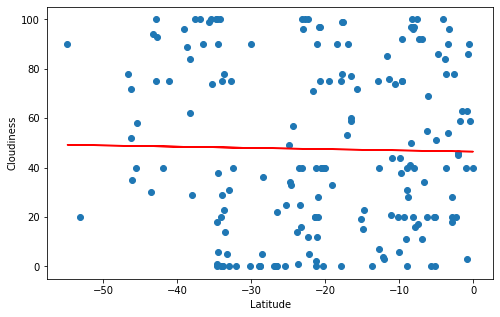

The r-squared is: 0.0003688925837422422


<Figure size 432x288 with 0 Axes>

In [113]:
fig, ax10 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Cloudiness']
ax10.set_xlabel('Latitude')
ax10.set_ylabel('Cloudiness')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter10.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

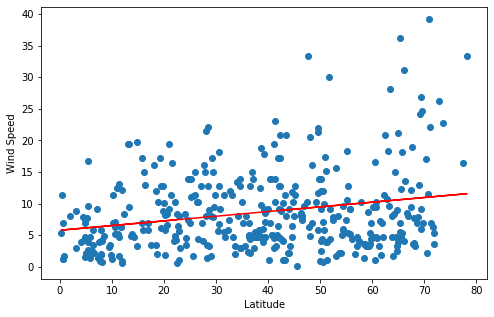

The r-squared is: 0.054758225212677196


<Figure size 432x288 with 0 Axes>

In [114]:
fig, ax11 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Windspeed']
ax11.set_xlabel('Latitude')
ax11.set_ylabel('Wind Speed')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter11.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

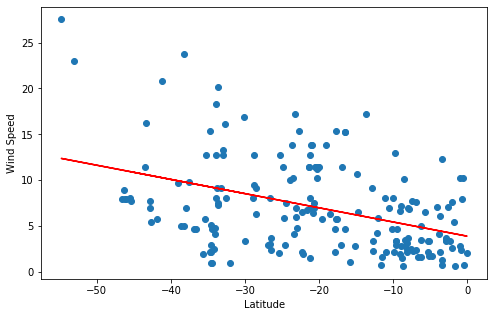

The r-squared is: 0.16779320369797268


<Figure size 432x288 with 0 Axes>

In [116]:
fig, ax12 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Windspeed']
ax12.set_xlabel('Latitude')
ax12.set_ylabel('Wind Speed')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Scatter12.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")